In [1]:
from random import uniform, randint
from typing import List, Dict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import max_norm
import matplotlib.pyplot as plt
import math
from statistics import mean, stdev
from scipy.stats import norm

In [2]:
SAMPLES = 5000

In [3]:
base = [randint(1, 100) for _ in range(SAMPLES)]
res = []
zeros = 0
ones = 0
for i in base:
    if i < 50:
        res.append(0)
        zeros += 1
    else:
        res.append(1)
        ones += 1
print(zeros)
print(ones)

2442
2558


In [4]:
noise = [randint(1,100) for _ in range(SAMPLES)]

In [5]:
data = {}
data["base"] = base
data["noise"] = noise
data["result"] = res


In [6]:
df = pd.DataFrame(data)
df.head(5)

,base,noise,result
0,18,51,0
1,97,44,1
2,76,80,1
3,5,85,0
4,13,56,0


In [7]:
all_features = df.drop("result",axis=1)
Targeted_feature = df["result"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3500, 2), (1500, 2), (3500,), (1500,))

In [8]:
FIRST_LAYER = 10
model = Sequential()
model.add(Dense(FIRST_LAYER, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-11-03 09:47:20.013372: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-03 09:47:20.013501: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
def create_history(columns: int, nodes: int) -> Dict:
    return {i:{j: [] for j in range(nodes)} for i in range(columns)}

In [10]:
history = create_history(len(X_train.columns), FIRST_LAYER)
history

{0: {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []},
 1: {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}}

In [11]:
for epoch in range(1, 501):
    print(f"RUNNING EPOCH {epoch}")
    hist = model.fit(
      x=X_train, 
      y=y_train, 
      epochs=1,
      batch_size=100,
    )
    all_weights = model.layers[0].get_weights()[0].tolist()
    for column in range(len(all_weights)):
        for node in range(len(all_weights[column])):
            history[column][node].append(all_weights[column][node])

RUNNING EPOCH 1


2022-11-03 09:47:26.157076: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/35 [..............................] - ETA: 11s - loss: 2.1648 - accuracy: 0.5200

2022-11-03 09:47:26.357330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 5ms/step - loss: 1.1957 - accuracy: 0.6363
RUNNING EPOCH 2
35/35 [==============================] - 0s 5ms/step - loss: 0.6119 - accuracy: 0.7980
RUNNING EPOCH 3
35/35 [==============================] - 0s 5ms/step - loss: 0.4688 - accuracy: 0.8083
RUNNING EPOCH 4
35/35 [==============================] - 0s 5ms/step - loss: 0.3865 - accuracy: 0.8271
RUNNING EPOCH 5
35/35 [==============================] - 0s 5ms/step - loss: 0.3342 - accuracy: 0.8414
RUNNING EPOCH 6
35/35 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.8374
RUNNING EPOCH 7
35/35 [==============================] - 0s 5ms/step - loss: 0.2884 - accuracy: 0.8491
RUNNING EPOCH 8
35/35 [==============================] - 0s 5ms/step - loss: 0.2812 - accuracy: 0.8540
RUNNING EPOCH 9
35/35 [==============================] - 0s 5ms/step - loss: 0.2698 - accuracy: 0.8594
RUNNING EPOCH 10
35/35 [==============================] - 0s 5ms/step - loss: 0.2629 - ac

In [12]:
light = "#90CCF4"
darker = "#5DA2D5"
important = "#F3D250"
noise = "#F78888"
other = "#ECECEC"

In [13]:
def generate_box_plot(ax, data: List, color: str, label: str, position_offset: int = 0, showfliers: bool = False):
    ax.set_xlabel("Input Column and Node Number")
    ax.set_ylabel("Weight Values")
    color = {"color": color}
    ax.boxplot(
        data,
        positions=[i + position_offset for i in range(1, 1 + FIRST_LAYER)],
        boxprops=color,
        medianprops=color,
        whiskerprops=color,
        capprops=color,
        flierprops={"markeredgecolor": other},
        showfliers=showfliers,
        labels=[f"{label}{i}" for i in range(1,1 + FIRST_LAYER)]
    )

In [15]:
def get_groups(index: int, nodes: int) -> List:
    group = []
    for i in range(nodes):
        group.append(history[index][i])
    return group

In [16]:
values = get_groups(0, FIRST_LAYER)
noises = get_groups(1, FIRST_LAYER)

In [17]:
all_fields = [values, noises]
colors = [important, noise]

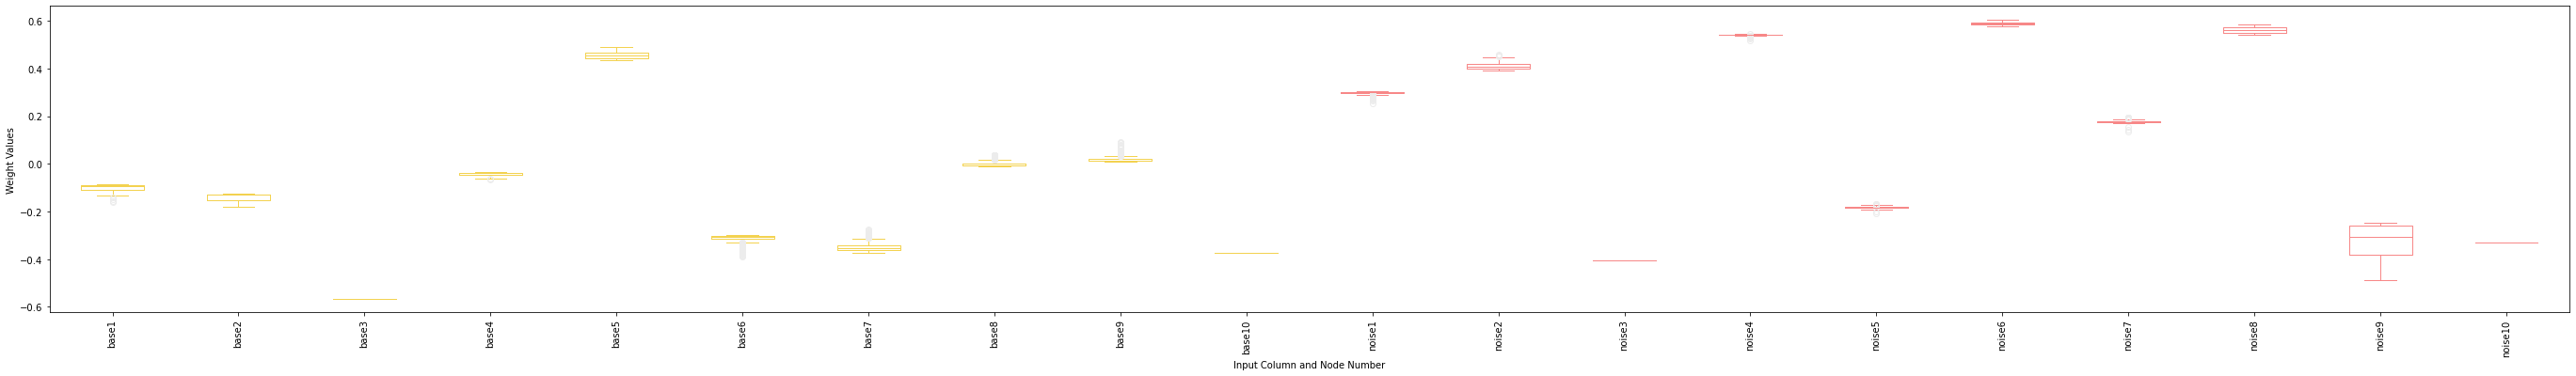

In [18]:
fig, ax = plt.subplots(figsize=(48,6))
column_names = list(df.columns[:-1])

for i, field in enumerate(all_fields):
    generate_box_plot(ax, field, colors[i], column_names[i], i * FIRST_LAYER, showfliers=True)
for label in ax.get_xticklabels():
    label.set_rotation(90)

In [19]:
def get_group_by_node(index: int) -> List:
    group = []
    for i in list(history.keys()):
        group.append(history[i][index])
    return group

In [20]:
def plot_pdfs(group, colors):
    fig, ax = plt.subplots(figsize=(16,6))
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    for mu, std, color in zip(means, stds, colors):
        probs = norm.pdf(domain, mu, std)
        ax.plot(domain, probs, color=color)
        ax.set_xlabel("Weight")
        ax.set_ylabel("Probability Density")

In [24]:
groups = [get_group_by_node(i) for i in range(FIRST_LAYER)]
groups[0]

[[-0.16036128997802734,
  -0.15584208071231842,
  -0.148725688457489,
  -0.1404239684343338,
  -0.13388238847255707,
  -0.13082782924175262,
  -0.1301908791065216,
  -0.13114553689956665,
  -0.13213959336280823,
  -0.1321040838956833,
  -0.1323631852865219,
  -0.13236762583255768,
  -0.132873997092247,
  -0.1320420205593109,
  -0.1325104534626007,
  -0.13238297402858734,
  -0.13190767168998718,
  -0.13217367231845856,
  -0.13306020200252533,
  -0.13254183530807495,
  -0.13307499885559082,
  -0.13049139082431793,
  -0.1319935917854309,
  -0.1320047527551651,
  -0.13064323365688324,
  -0.13078033924102783,
  -0.13022810220718384,
  -0.1294727772474289,
  -0.12961161136627197,
  -0.130380317568779,
  -0.1300535351037979,
  -0.13027775287628174,
  -0.13062748312950134,
  -0.12976156175136566,
  -0.13016609847545624,
  -0.131145641207695,
  -0.13028953969478607,
  -0.12976990640163422,
  -0.12950417399406433,
  -0.129415825009346,
  -0.1295100897550583,
  -0.12900307774543762,
  -0.12881219

/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


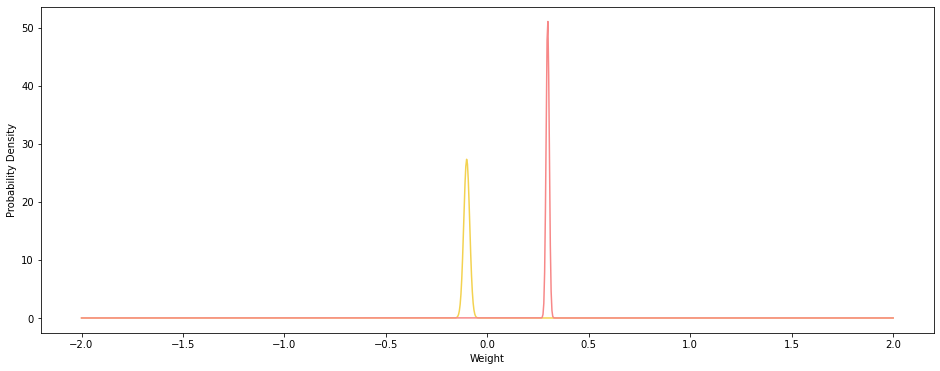

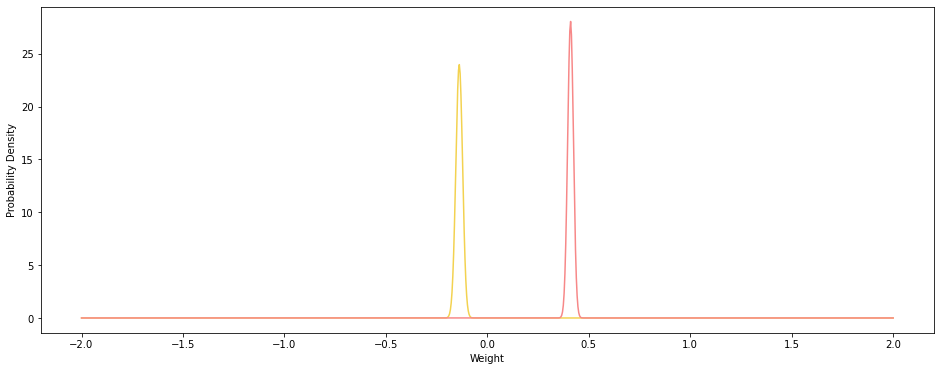

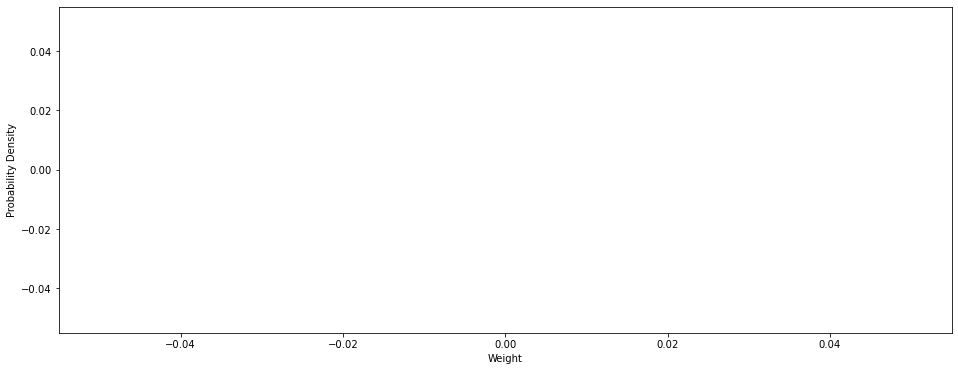

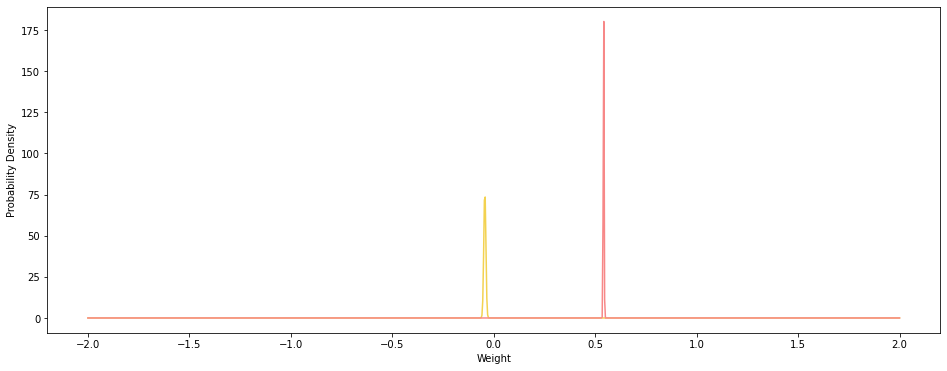

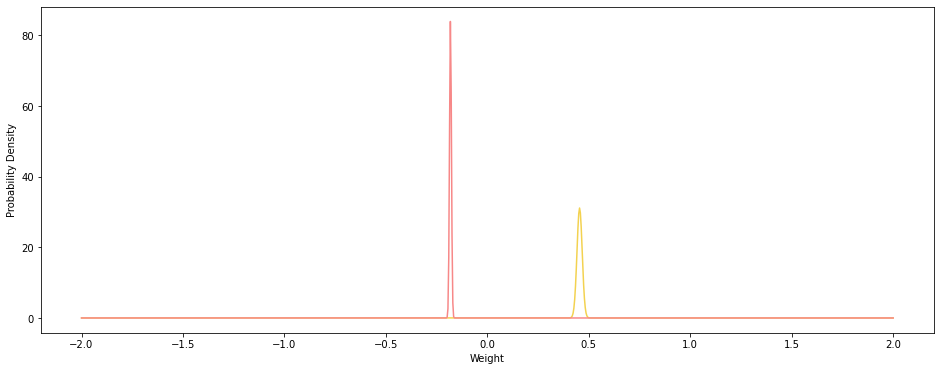

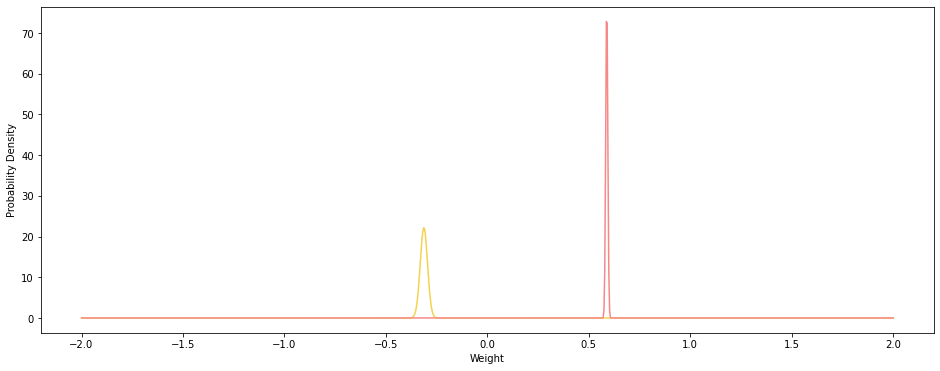

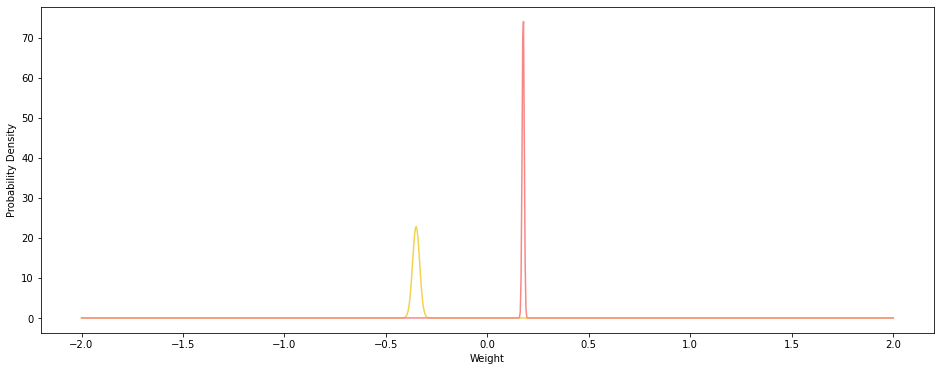

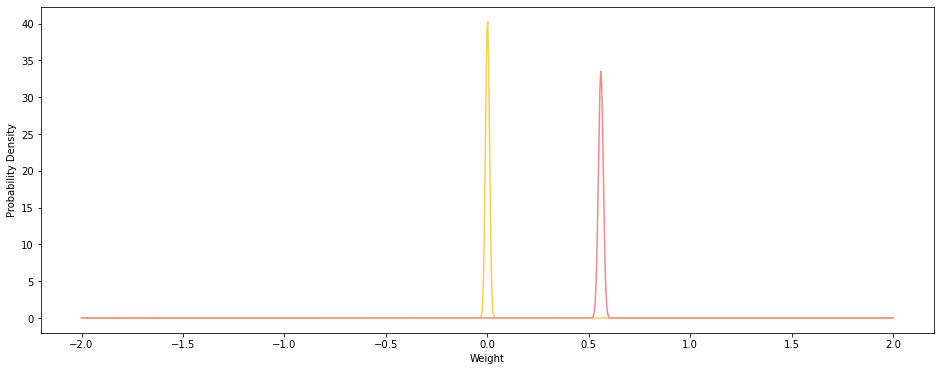

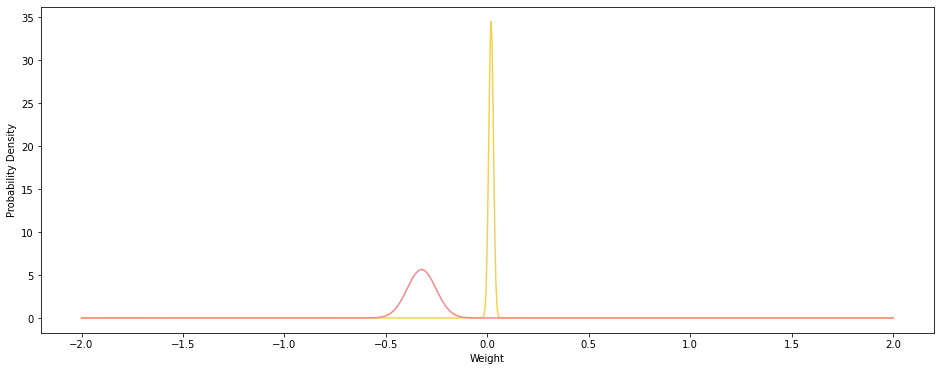

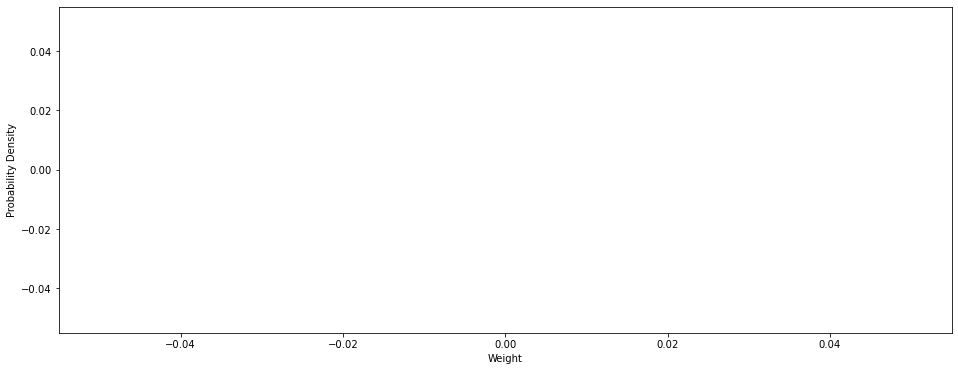

In [25]:
for group in groups:
    plot_pdfs(group, colors)

In [26]:
def get_props(group):
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    results = []
    for mu, std in zip(means, stds):
        values = []
        probs = norm.pdf(domain, mu, std)
        for prob in probs:
            try:
                if math.floor(prob) != 0:
                    values.append(abs(prob))
            except ValueError:
                pass
        results.append(values)
    return results

In [27]:
columns = list(df.columns)[:-1]

In [28]:
len(groups)

10

In [30]:
all_probs = [get_props(group) for group in groups]

/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


[[[1.2082857978505397,
   2.309515999441231,
   4.094119702051029,
   6.731135820863758,
   10.263711311089665,
   14.514723226757212,
   19.037124335876452,
   23.15699439198014,
   26.124698748622972,
   27.334343548020804,
   26.52493097480649,
   23.871963016683242,
   19.92554734700635,
   15.424839149976483,
   11.074376499941533,
   7.374051753813372,
   4.5538774066702015,
   2.608223149402887,
   1.3854677214020126],
  [2.5325605017621307,
   7.881541300053744,
   18.775854894621503,
   34.239350917443524,
   47.795671121362915,
   51.0727030093574,
   41.77595251874557,
   26.15779407953256,
   12.537562485970902,
   4.600047780117111,
   1.2919592421265584]],
 [[1.4141949187335174,
   2.435208973393069,
   3.957533011026828,
   6.069797531253014,
   8.785878861634801,
   12.002108958689357,
   15.473596475161598,
   18.827225170329655,
   21.61935407022787,
   23.429361835494973,
   23.962909778880206,
   23.130232249113774,
   21.07083674314893,
   18.115274475687166,
   14

In [36]:
def barrage(all_probs, columns: int):
    res = {i: {"len": 0, "max": 0, "sum": 0, "mean": 0, "stdev": 0} for i in range(columns)}
    for probs in all_probs:
        for i, prob in enumerate(probs):
            if len(prob) > 0:
                res[i]["len"] += len(prob)
                res[i]["max"] += max(prob)
                res[i]["sum"] += sum(prob)
                res[i]["mean"] += mean(prob)
                res[i]["stdev"] += stdev(prob)
    return res

In [37]:
length = len(list(df.columns)[:-1])
res = barrage(all_probs, length)
for i in range(length):
    res[columns[i]] = res.pop(i)
res

{'base': {'len': 137,
  'max': 275.64508767038274,
  'sum': 1979.9766611437385,
  'mean': 128.50972681291012,
  'stdev': 99.37374325603986},
 'noise': {'len': 138,
  'max': 529.2255533183401,
  'sum': 1976.8800980935205,
  'mean': 236.010918566479,
  'stdev': 219.0450871207213}}

In [38]:
df = pd.DataFrame(res)
df

,base,noise
len,137.000000,138.000000
max,275.645088,529.225553
sum,1979.976661,1976.880098
mean,128.509727,236.010919
stdev,99.373743,219.045087


<AxesSubplot:>

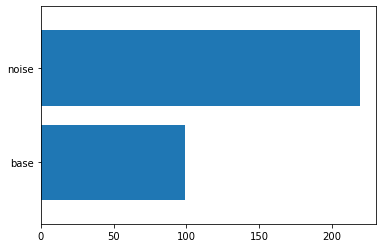

In [39]:
pd.Series(df.loc["stdev"],df.columns).sort_values(ascending=True).plot.barh(width=0.8)